- User Personalized Forecast
- Real-time weather integration
- Historical device matching (Model tested based on best match)
- 90 Days Forecast
- Output saved to CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_Humid_Temp_Cleaned.csv')  # Load your dataset

In [3]:
df.head(10)  # Display the first few rows of the DataFrame

,dbtimestamp,index,devicename,Soil Phosphorus,Soil Potassium,Soil Nitrogen,Humidity,Air Temperature,Soil pH,Soil EC,Soil Moisture,Soil Temperature,green_g,brown_g,water_g,days_since_last_green,days_since_last_brown,days_since_last_water,valid_sensor_count
0,2024-07-22,4,NDS004,255.0,259.0,171.0,89.318182,26.318182,7.0,18.0,11.4,29.5,0.0,0.0,0.0,0.0,0.0,0.0,9
1,2024-07-23,5,NDS004,23.0,15.0,255.0,90.000000,27.000000,5.3,136.0,21.7,29.5,0.0,0.0,0.0,0.0,0.0,0.0,9
2,2024-07-24,6,NDS004,21.0,13.0,255.0,90.000000,27.000000,5.2,133.0,21.1,29.3,8.0,0.0,50.0,0.0,0.0,0.0,9
3,2024-07-25,7,NDS004,33.0,26.0,255.0,90.000000,27.000000,6.0,159.0,22.9,28.8,0.0,0.0,0.0,1.0,0.0,1.0,9
4,2024-07-26,8,NDS004,29.0,21.0,255.0,90.000000,27.000000,6.5,150.0,22.9,28.8,7.0,3.0,50.0,0.0,0.0,0.0,9
5,2024-07-27,9,NDS004,28.0,20.0,255.0,90.000000,27.000000,6.3,148.0,23.6,28.8,0.0,0.0,0.0,1.0,1.0,1.0,9
6,2024-07-28,10,NDS004,28.0,20.0,255.0,90.000000,27.000000,6.1,147.0,23.0,28.9,0.0,0.0,0.0,2.0,2.0,2.0,9
7,2024-07-29,11,NDS004,27.0,19.0,255.0,92.631579,26.315789,6.0,146.0,23.0,28.6,0.0,0.0,0.0,3.0,3.0,3.0,9
8,2024-07-30,12,NDS004,27.0,19.0,255.0,95.000000,26.000000,6.0,146.0,23.0,28.6,0.0,0.0,0.0,4.0,4.0,4.0,9
9,2024-07-31,13,NDS004,27.0,19.0,255.0,95.000000,26.000000,6.0,146.0,23.0,28.6,0.0,0.0,0.0,5.0,5.0,5.0,9


In [4]:
# Ensure datetime format
df['dbtimestamp'] = pd.to_datetime(df['dbtimestamp'])

In [5]:
df = df.drop(columns=['index', 'valid_sensor_count'])  # Drop unnecessary column if it exists

In [6]:
df.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dbtimestamp            2176 non-null   datetime64[ns]
 1   devicename             2176 non-null   object        
 2   Soil Phosphorus        2176 non-null   float64       
 3   Soil Potassium         2176 non-null   float64       
 4   Soil Nitrogen          2176 non-null   float64       
 5   Humidity               2176 non-null   float64       
 6   Air Temperature        2176 non-null   float64       
 7   Soil pH                2176 non-null   float64       
 8   Soil EC                2176 non-null   float64       
 9   Soil Moisture          2176 non-null   float64       
 10  Soil Temperature       2176 non-null   float64       
 11  green_g                2176 non-null   float64       
 12  brown_g                2176 non-null   float64       
 13  wat

In [7]:
df.head(10)  # Display the first few rows of the DataFrame

,dbtimestamp,devicename,Soil Phosphorus,Soil Potassium,Soil Nitrogen,Humidity,Air Temperature,Soil pH,Soil EC,Soil Moisture,Soil Temperature,green_g,brown_g,water_g,days_since_last_green,days_since_last_brown,days_since_last_water
0,2024-07-22,NDS004,255.0,259.0,171.0,89.318182,26.318182,7.0,18.0,11.4,29.5,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-07-23,NDS004,23.0,15.0,255.0,90.000000,27.000000,5.3,136.0,21.7,29.5,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-07-24,NDS004,21.0,13.0,255.0,90.000000,27.000000,5.2,133.0,21.1,29.3,8.0,0.0,50.0,0.0,0.0,0.0
3,2024-07-25,NDS004,33.0,26.0,255.0,90.000000,27.000000,6.0,159.0,22.9,28.8,0.0,0.0,0.0,1.0,0.0,1.0
4,2024-07-26,NDS004,29.0,21.0,255.0,90.000000,27.000000,6.5,150.0,22.9,28.8,7.0,3.0,50.0,0.0,0.0,0.0
5,2024-07-27,NDS004,28.0,20.0,255.0,90.000000,27.000000,6.3,148.0,23.6,28.8,0.0,0.0,0.0,1.0,1.0,1.0
6,2024-07-28,NDS004,28.0,20.0,255.0,90.000000,27.000000,6.1,147.0,23.0,28.9,0.0,0.0,0.0,2.0,2.0,2.0
7,2024-07-29,NDS004,27.0,19.0,255.0,92.631579,26.315789,6.0,146.0,23.0,28.6,0.0,0.0,0.0,3.0,3.0,3.0
8,2024-07-30,NDS004,27.0,19.0,255.0,95.000000,26.000000,6.0,146.0,23.0,28.6,0.0,0.0,0.0,4.0,4.0,4.0
9,2024-07-31,NDS004,27.0,19.0,255.0,95.000000,26.000000,6.0,146.0,23.0,28.6,0.0,0.0,0.0,5.0,5.0,5.0


In [8]:
df.describe()  # Get a statistical summary of the DataFrame

,dbtimestamp,Soil Phosphorus,Soil Potassium,Soil Nitrogen,Humidity,Air Temperature,Soil pH,Soil EC,Soil Moisture,Soil Temperature,green_g,brown_g,water_g,days_since_last_green,days_since_last_brown,days_since_last_water
count,2176,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,2024-11-20 02:00:26.470588160,425.358686,419.444164,189.106388,94.850749,24.799990,6.239637,964.380515,49.379871,27.753286,1.722426,3.966912,4.131434,10.650735,10.367188,14.969669
min,2024-07-11 00:00:00,1.000000,1.000000,1.000000,85.000000,22.298962,3.000000,18.000000,6.800000,24.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-09-19 00:00:00,182.000000,176.000000,64.000000,93.000000,24.125000,5.500000,433.750000,27.500000,26.900000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,2024-11-18 12:00:00,340.000000,332.500000,145.000000,95.000000,24.894737,6.000000,790.000000,45.600000,27.600000,0.000000,0.000000,0.000000,4.000000,5.000000,9.000000
75%,2025-01-18 00:00:00,592.000000,589.000000,255.000000,96.442360,25.208620,7.000000,1333.750000,66.000000,28.600000,0.000000,0.000000,0.000000,11.000000,11.000000,20.000000
max,2025-06-06 00:00:00,1729.000000,1735.000000,1636.500000,100.000000,27.000000,9.000000,3674.000000,100.000000,31.700000,105.000000,253.000000,200.000000,137.000000,123.000000,123.000000
std,NaN,348.196739,346.878552,186.259638,3.105163,0.795308,1.104244,723.748008,25.110927,1.124011,9.182150,17.753479,17.273439,19.887645,17.406718,18.684999


In [9]:
for device in df['devicename'].unique():
    device_data = df[df['devicename'] == device]
    print(f"Device: {device}")
    print(device_data['Soil Moisture'].describe()) 
    print("\n")

Device: NDS004
count    231.000000
mean      40.158874
std       14.035158
min       11.400000
25%       22.650000
50%       42.300000
75%       52.000000
max       65.300000
Name: Soil Moisture, dtype: float64


Device: NDS005
count    231.000000
mean      45.915584
std       23.781511
min        6.800000
25%       26.800000
50%       40.700000
75%       48.300000
max      100.000000
Name: Soil Moisture, dtype: float64


Device: NDS006
count    235.000000
mean      44.891489
std       21.533558
min        7.000000
25%       27.500000
50%       44.600000
75%       66.600000
max       88.200000
Name: Soil Moisture, dtype: float64


Device: NDS007
count    242.000000
mean      69.881405
std       33.293736
min       19.200000
25%       27.000000
50%       94.800000
75%      100.000000
max      100.000000
Name: Soil Moisture, dtype: float64


Device: NDS010
count    230.000000
mean      64.516087
std       19.821991
min       20.700000
25%       45.225000
50%       69.400000
75%       83.

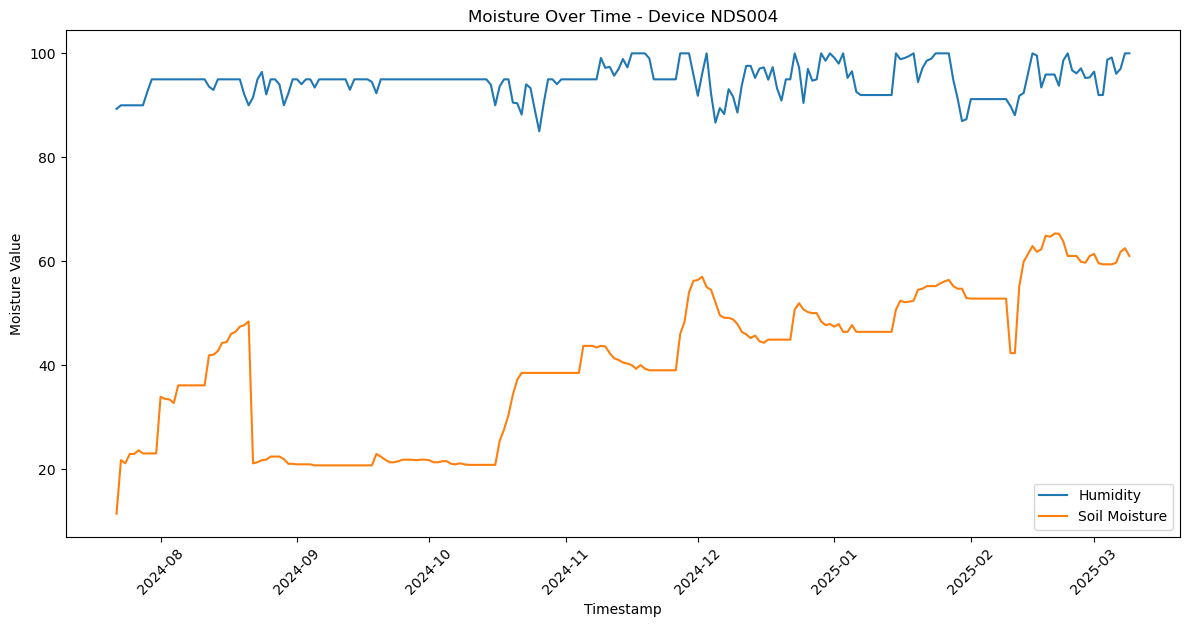

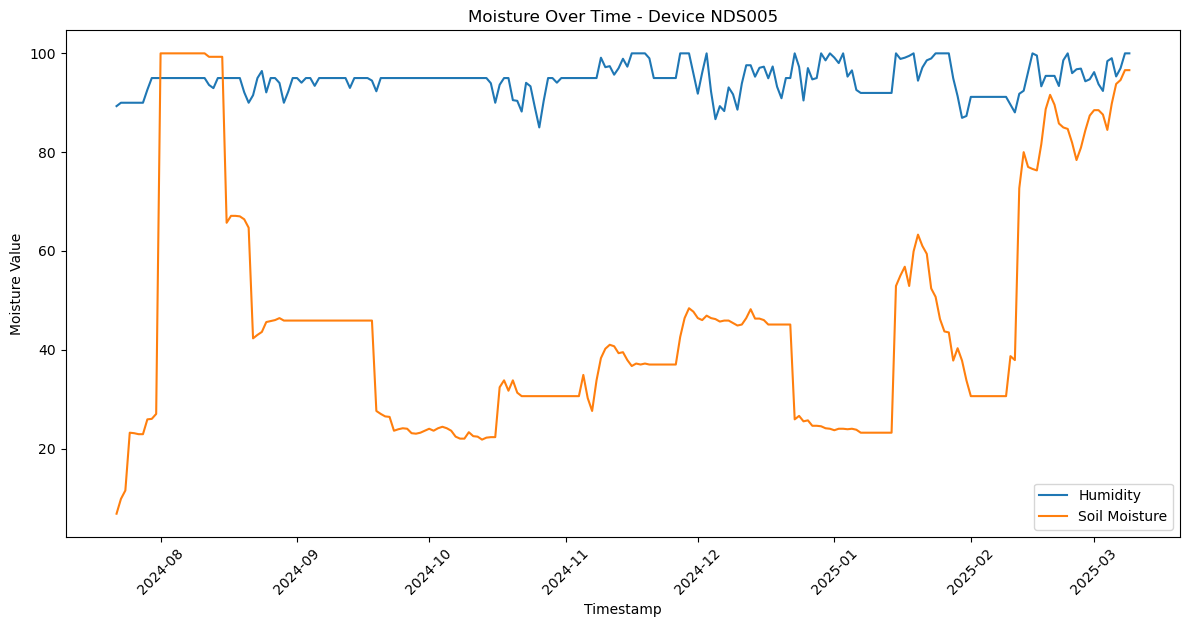

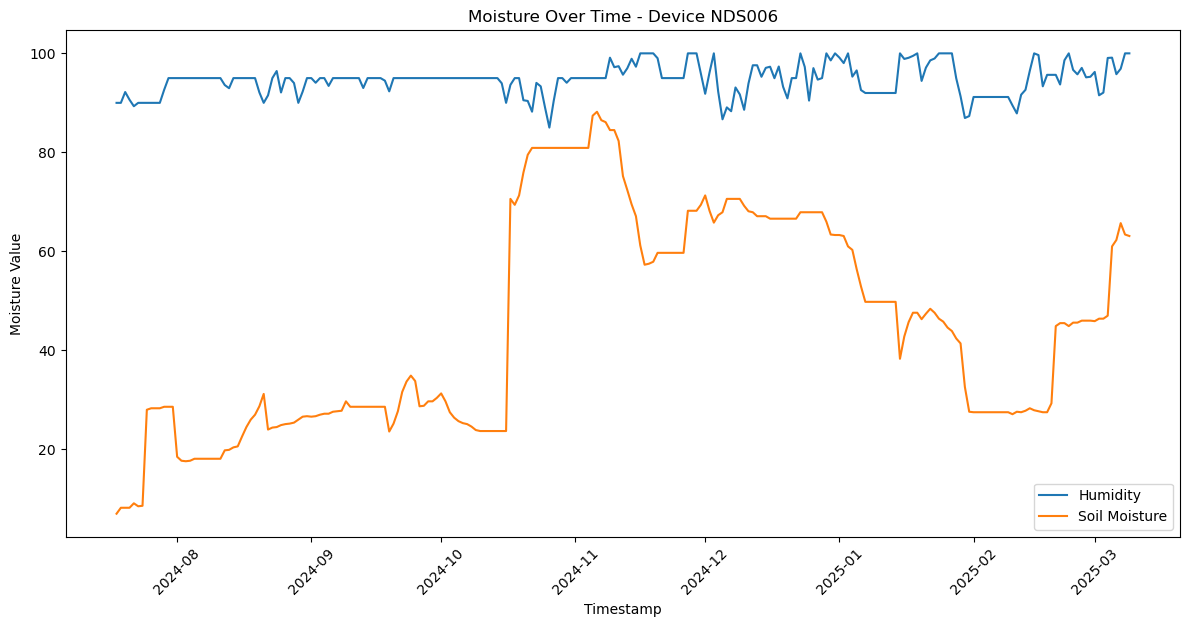

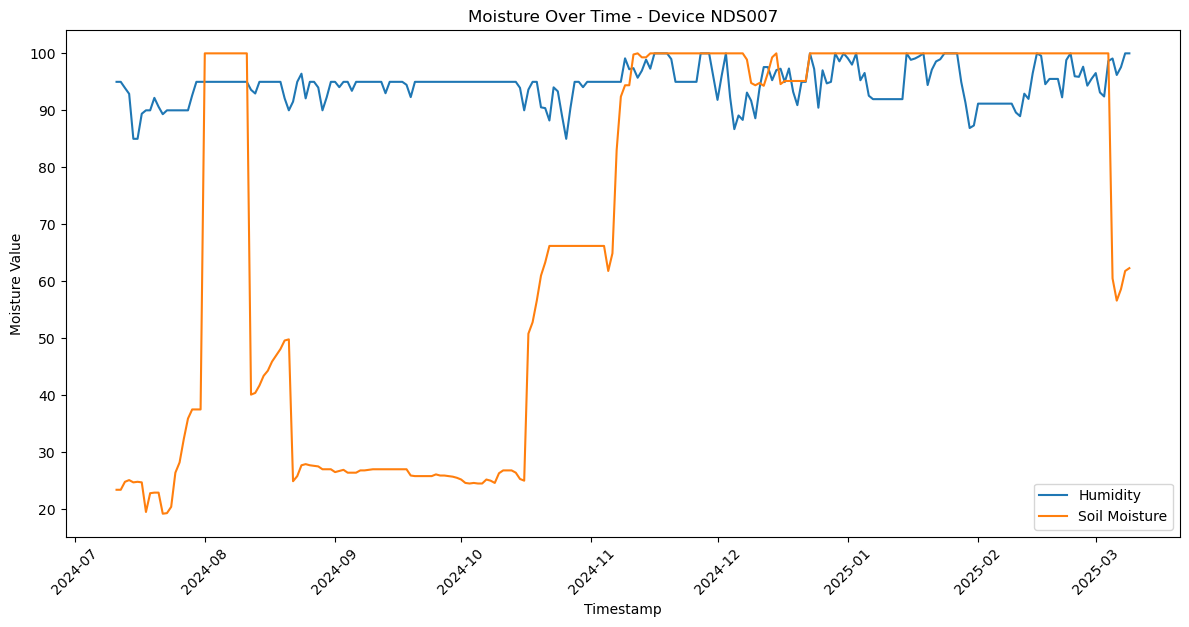

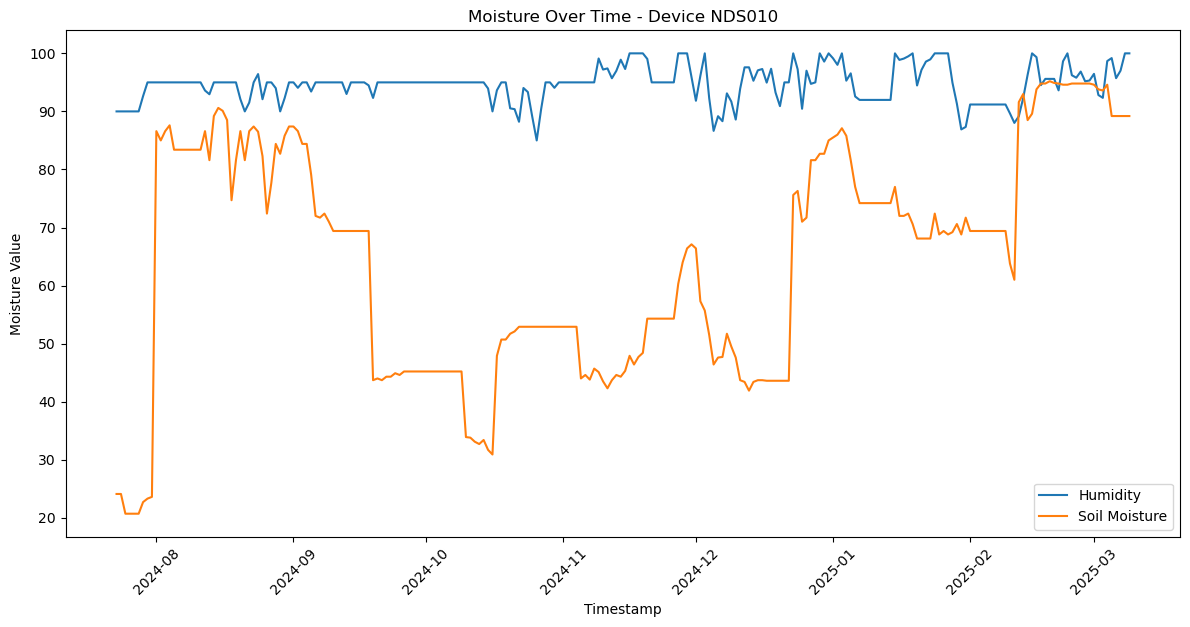

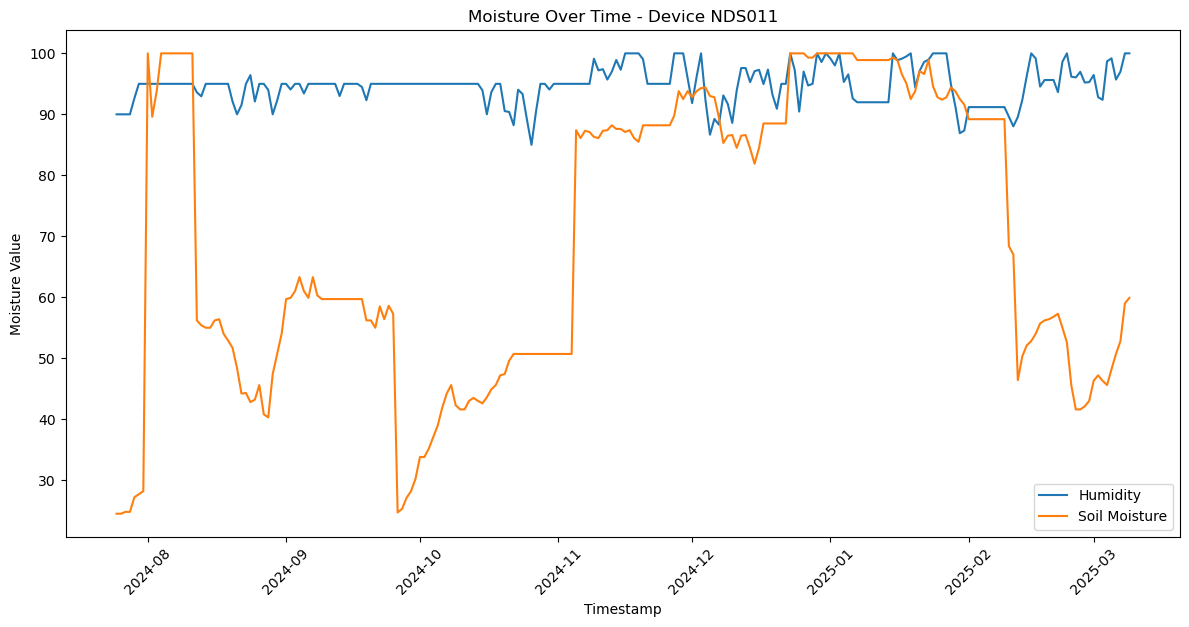

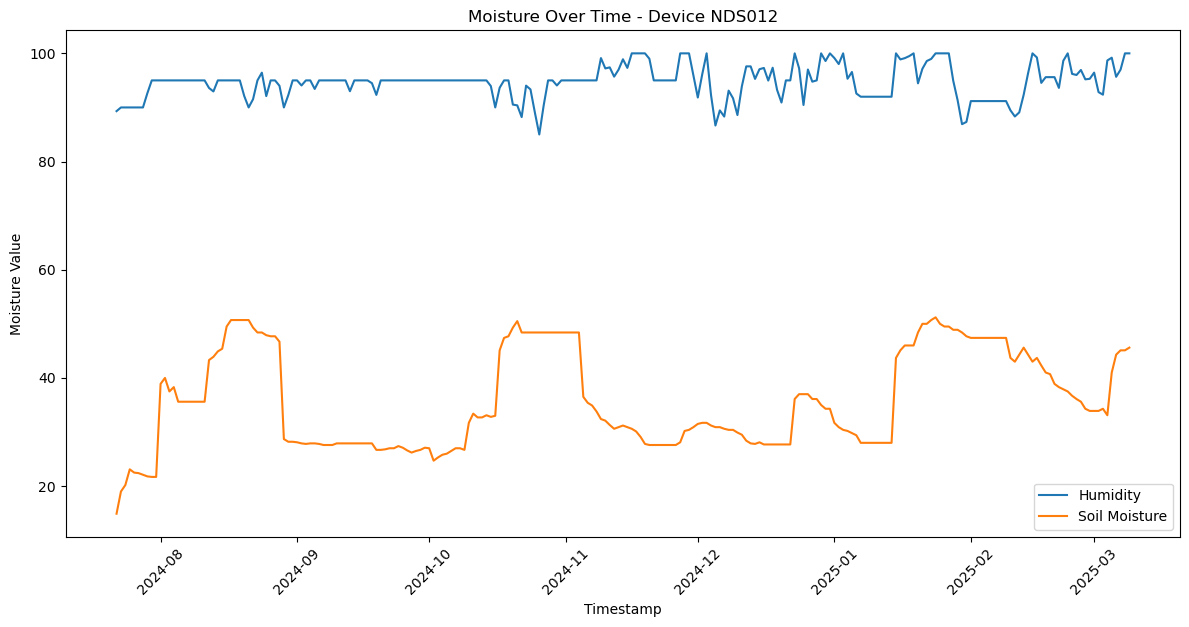

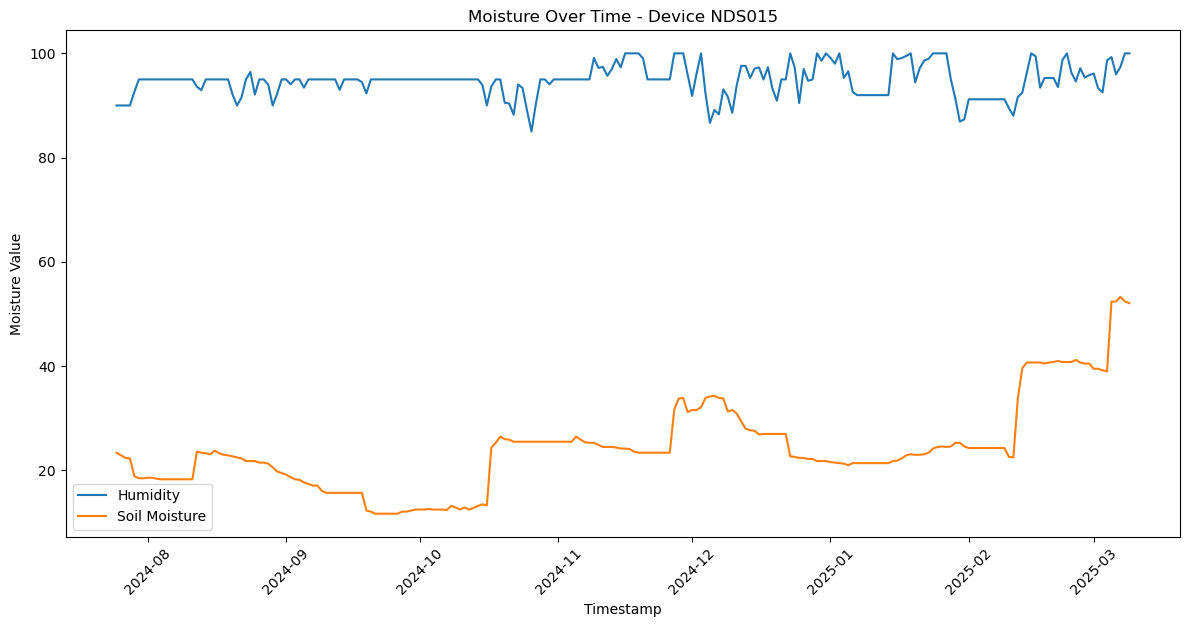

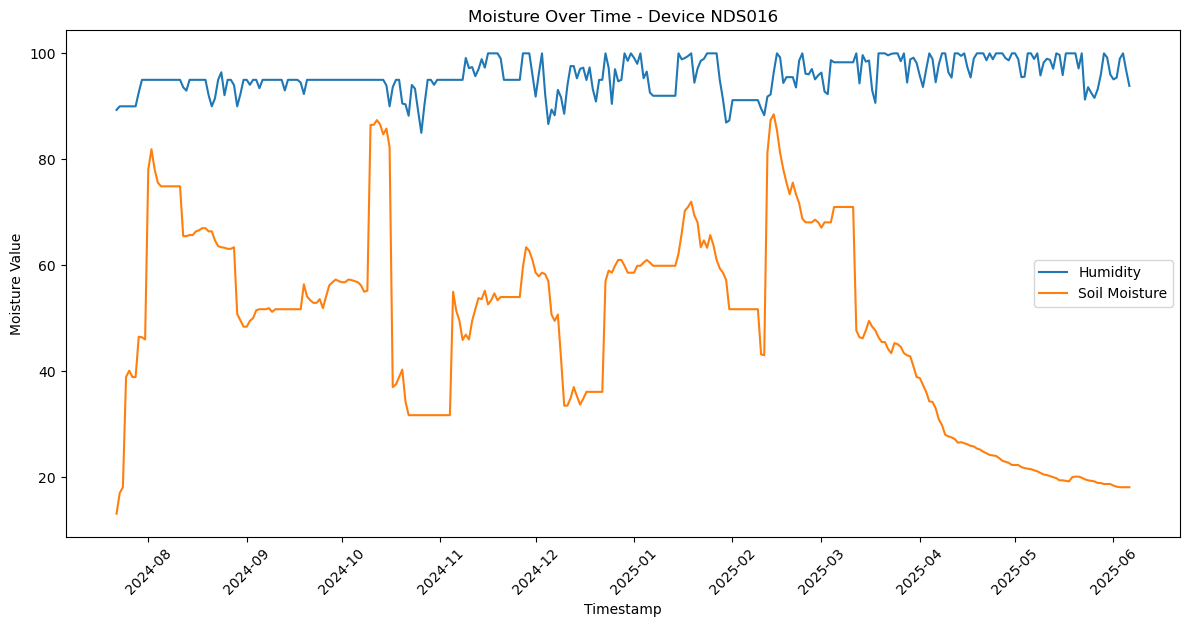

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

moisture = ['Humidity', 'Soil Moisture']

# Plot each NPK sensor value over time for each devicename
for device in df['devicename'].unique():
    df_device = df[df['devicename'] == device]

    plt.figure(figsize=(12, 6))
    for col in moisture:
        sns.lineplot(data=df_device, x='dbtimestamp', y=col, label=col)
    
    plt.title(f'Moisture Over Time - Device {device}')
    plt.xlabel('Timestamp')
    plt.ylabel('Moisture Value')
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

User Input

In [11]:
user_input = {
    'Soil EC': float(input("Enter your current Soil EC: ")),
    'Soil pH': float(input("Enter current Soil pH: ")),
    'Soil Moisture': float(input("Enter current Soil Moisture (%): ")),
    'Soil Temperature': float(input("Enter current Soil Temp (°C): ")),
    'green_g': float(input("Enter green_g feeding today (g): ")),
    'brown_g': float(input("Enter brown_g feeding today (g): ")),
    'water_g': float(input("Enter water_g feeding today (ml): ")),
    'days_since_last_green': int(input("Days since last green feeding: ")),
    'days_since_last_brown': int(input("Days since last brown feeding: ")),
    'days_since_last_water': int(input("Days since last water feeding: "))
}

In [12]:
for input in user_input:
    print (f"{input}: {user_input[input]}")

Soil EC: 262.0
Soil pH: 5.5
Soil Moisture: 23.0
Soil Temperature: 24.0
green_g: 23.0
brown_g: 233.0
water_g: 342.0
days_since_last_green: 0
days_since_last_brown: 0
days_since_last_water: 0


Integrate Real Time Weather API

In [13]:
# OpenWeatherMap API Integration for Jupyter Notebook
import requests
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration
API_KEY = "8f3b755593a14b8ddffa813b1151abec"  # Your actual API key
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Singapore coordinates (adjust if needed)
LAT = 1.3521
LON = 103.8198
CITY = "Singapore"

class WeatherAPI:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = BASE_URL
    
    def get_current_weather(self, lat=LAT, lon=LON):
        """Get current weather data"""
        url = f"{self.base_url}/weather"
        params = {
            'lat': lat,
            'lon': lon,
            'appid': self.api_key,
            'units': 'metric'  # Celsius
        }
        
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching current weather: {e}")
            return None
    
    def get_5day_forecast(self, lat=LAT, lon=LON):
        """Get 5-day weather forecast (every 3 hours)"""
        url = f"{self.base_url}/forecast"
        params = {
            'lat': lat,
            'lon': lon,
            'appid': self.api_key,
            'units': 'metric'
        }
        
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching forecast: {e}")
            return None
    
    def get_historical_weather(self, lat=LAT, lon=LON, start_date=None, end_date=None):
        """
        Get historical weather data (requires paid subscription)
        This is for demonstration - you'll need the appropriate API endpoint
        """
        # Note: This requires a paid subscription
        url = f"{self.base_url}/timemachine"  # This might not work with free tier
        
        if start_date is None:
            start_date = datetime.now() - timedelta(days=30)
        
        timestamp = int(start_date.timestamp())
        
        params = {
            'lat': lat,
            'lon': lon,
            'dt': timestamp,
            'appid': self.api_key,
            'units': 'metric'
        }
        
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching historical data: {e}")
            return None

# Initialize the weather API
weather = WeatherAPI(API_KEY)

In [14]:
# For 30-day climate forecast (if you have pro subscription)
def get_30day_climate_forecast():
    """Get 30-day climate forecast using Pro API"""
    url = f"https://pro.openweathermap.org/data/2.5/forecast/climate"
    params = {
        'lat': LAT,
        'lon': LON,
        'appid': API_KEY,
        'units': 'metric'
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching 30-day forecast: {e}")
        print("Note: 30-day climate forecast requires a Pro subscription")
        return None

# Example 1: Get Current Weather
print("=== CURRENT WEATHER ===")
current = weather.get_current_weather()
if current:
    print(f"Temperature: {current['main']['temp']}°C")
    print(f"Humidity: {current['main']['humidity']}%")
    print(f"Weather: {current['weather'][0]['description']}")
    print(f"Wind Speed: {current['wind']['speed']} m/s")
else:
    print("Failed to fetch current weather")

print("\n" + "="*50 + "\n")


=== CURRENT WEATHER ===
Temperature: 29.93°C
Humidity: 71%
Weather: overcast clouds
Wind Speed: 5.31 m/s




In [15]:
# Example 2: Get 5-Day Forecast
print("=== 5-DAY FORECAST ===")
forecast = weather.get_5day_forecast()
if forecast:
    # Convert to DataFrame for easier analysis
    forecast_data = []
    
    for item in forecast['list']:
        forecast_data.append({
            'datetime': datetime.fromtimestamp(item['dt']),
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'weather': item['weather'][0]['description'],
            'wind_speed': item['wind']['speed'],
            'precipitation': item.get('rain', {}).get('3h', 0)  # 3-hour precipitation
        })
    
    df_forecast = pd.DataFrame(forecast_data)
    print(df_forecast.head())
    
    # Daily averages
    df_forecast['date'] = df_forecast['datetime'].dt.date
    daily_avg = df_forecast.groupby('date').agg({
        'temperature': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'precipitation': 'sum'
    }).round(2)
    
    print("\n=== DAILY AVERAGES ===")
    print(daily_avg)

print("\n" + "="*50 + "\n")


=== 5-DAY FORECAST ===
             datetime  temperature  humidity          weather  wind_speed  \
0 2025-08-01 20:00:00        29.43        72  overcast clouds        4.92   
1 2025-08-01 23:00:00        29.30        74  overcast clouds        3.94   
2 2025-08-02 02:00:00        28.61        78       light rain        3.57   
3 2025-08-02 05:00:00        28.22        76       light rain        4.22   
4 2025-08-02 08:00:00        28.25        78  overcast clouds        3.96   

   precipitation  
0           0.00  
1           0.00  
2           0.71  
3           0.38  
4           0.00  

=== DAILY AVERAGES ===
            temperature  humidity  wind_speed  precipitation
date                                                        
2025-08-01        29.36     73.00        4.43           0.00
2025-08-02        29.06     74.38        4.45           1.95
2025-08-03        28.64     74.62        4.26           3.75
2025-08-04        27.87     75.88        3.99           9.32
2025-08-05

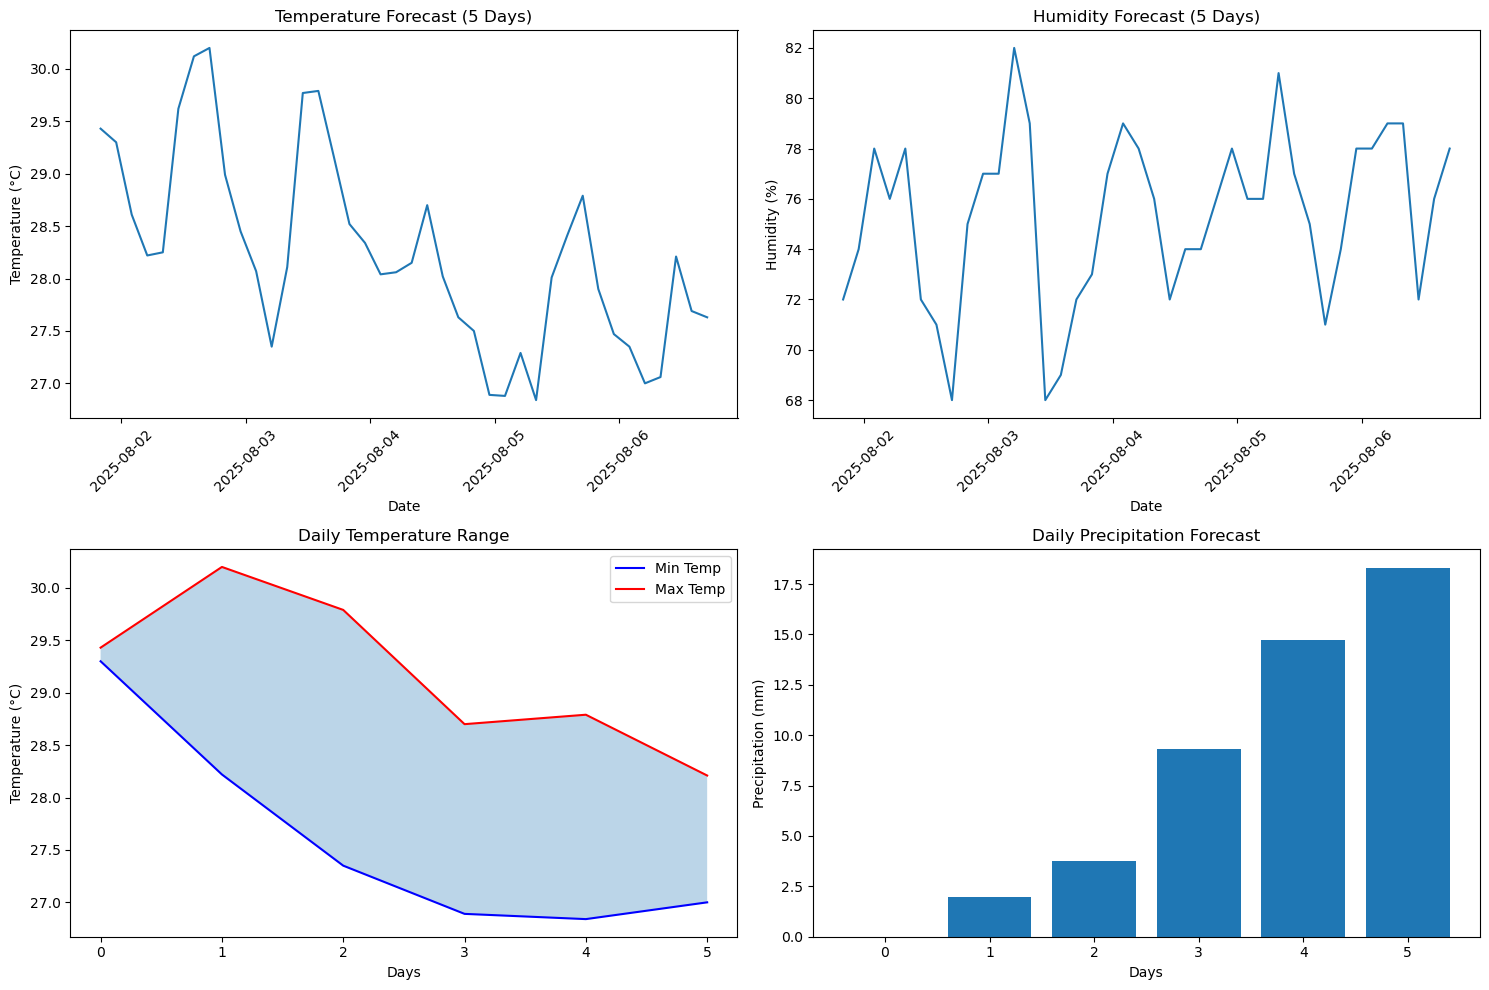

In [16]:
# Example 3: Visualisation
if forecast:
    plt.figure(figsize=(15, 10))
    
    # Temperature trend
    plt.subplot(2, 2, 1)
    plt.plot(df_forecast['datetime'], df_forecast['temperature'])
    plt.title('Temperature Forecast (5 Days)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    
    # Humidity trend
    plt.subplot(2, 2, 2)
    plt.plot(df_forecast['datetime'], df_forecast['humidity'])
    plt.title('Humidity Forecast (5 Days)')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45)
    
    # Daily temperature range
    plt.subplot(2, 2, 3)
    daily_temp = df_forecast.groupby('date')['temperature'].agg(['min', 'max'])
    plt.fill_between(range(len(daily_temp)), daily_temp['min'], daily_temp['max'], alpha=0.3)
    plt.plot(range(len(daily_temp)), daily_temp['min'], 'b-', label='Min Temp')
    plt.plot(range(len(daily_temp)), daily_temp['max'], 'r-', label='Max Temp')
    plt.title('Daily Temperature Range')
    plt.xlabel('Days')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    
    # Precipitation
    plt.subplot(2, 2, 4)
    daily_precip = df_forecast.groupby('date')['precipitation'].sum()
    plt.bar(range(len(daily_precip)), daily_precip)
    plt.title('Daily Precipitation Forecast')
    plt.xlabel('Days')
    plt.ylabel('Precipitation (mm)')
    
    plt.tight_layout()
    plt.show()

Define Features

In [17]:
matching_cols = [
    'Soil EC', 'Soil pH', 'Soil Temperature', 'Air Temperature', 'Humidity',
    'green_g', 'brown_g', 'water_g',
    'days_since_last_green', 'days_since_last_brown', 'days_since_last_water',
    'Soil Moisture'
]

Compute User Input to Model Input to Search for Best Model

In [18]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

df_filtered = df.dropna(subset=matching_cols).copy()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_filtered[matching_cols])
scaled_input = scaler.transform([[user_input.get(col, 0) for col in matching_cols]])

c:\Users\leong\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
distances = cdist(scaled_input, scaled_df)[0]
df_filtered['similarity'] = distances
best_device = df_filtered.sort_values('similarity').iloc[0]['devicename']
print(f"Best-matching device: {best_device}")

Best-matching device: NDS006


Train Model

In [20]:
df_device = df[df['devicename'] == best_device].copy()

In [21]:
feature_cols = matching_cols.copy()
target_col = 'Soil Moisture'

In [22]:
train = df_device[df_device['dbtimestamp'] < '2025-01-01']
X_train = train[feature_cols]
y_train = train[target_col]

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

30 Days Forecast

In [24]:
initial = user_input.copy()
future_data = []

In [25]:
from datetime import timedelta

decay_rate = 0.95  # daily decay for feeding materials

for day in range(30):
    # --- Real Time Update ---
    # Try to get today's weather from API
    weather_today = weather.get_current_weather()
    if weather_today:
        initial['Air Temperature'] = weather_today['main']['temp']
        initial['Humidity'] = weather_today['main']['humidity']
    else:
        # fallback: keep previous day's values
        # fallback: use previous day's values or set to reasonable defaults
        if 'Air Temperature' not in initial:
            initial['Air Temperature'] = 28  # example default
        if 'Humidity' not in initial:
            initial['Humidity'] = 80   

    # Prepare input for model prediction
    X_in = pd.DataFrame([initial])[feature_cols]
    pred = model.predict(X_in)[0]

    # Create current row
    row = initial.copy()
    row['Predicted Soil Moisture'] = pred
    row['dbtimestamp'] = pd.to_datetime('today') + timedelta(days=day)
    future_data.append(row.copy())

    # Apply decay manually (simulate compost decomposition)
    initial['green_g'] *= 0.9  # decay by 10%
    initial['brown_g'] *= 0.9
    initial['water_g'] *= 0.95

    # Update days_since_last_* to +1 each day
    for feed in ['green', 'brown', 'water']:
        initial[f'days_since_last_{feed}'] += 1

    # Update Soil Moisture with predicted value
    initial['Soil Moisture'] = pred

    # Optional: Add small random variation if no API
    if not weather_today:
        initial['Air Temperature'] += np.random.normal(0, 0.1)
        initial['Humidity'] += np.random.normal(0, 0.2)

In [26]:
forecast_df = pd.DataFrame(future_data)

In [27]:
start_row = user_input.copy()
start_row['Predicted Soil Moisture'] = user_input['Soil Moisture']
start_row['dbtimestamp'] = pd.to_datetime('today')

forecast_df = pd.concat([pd.DataFrame([start_row]), forecast_df], ignore_index=True)

Plot 30 Days Forecast

In [28]:
# Find first date where moisture < 40%
below_40 = forecast_df[forecast_df['Predicted Soil Moisture'] < 40]

if not below_40.empty:
    drop_date = below_40.iloc[0]['dbtimestamp']
    print(f"Moisture drops below 40% on: {drop_date.strftime('%Y-%m-%d')}")
else:
    drop_date = None
    print("Moisture stays above 40% for the full 90 days.")


Moisture drops below 40% on: 2025-08-01


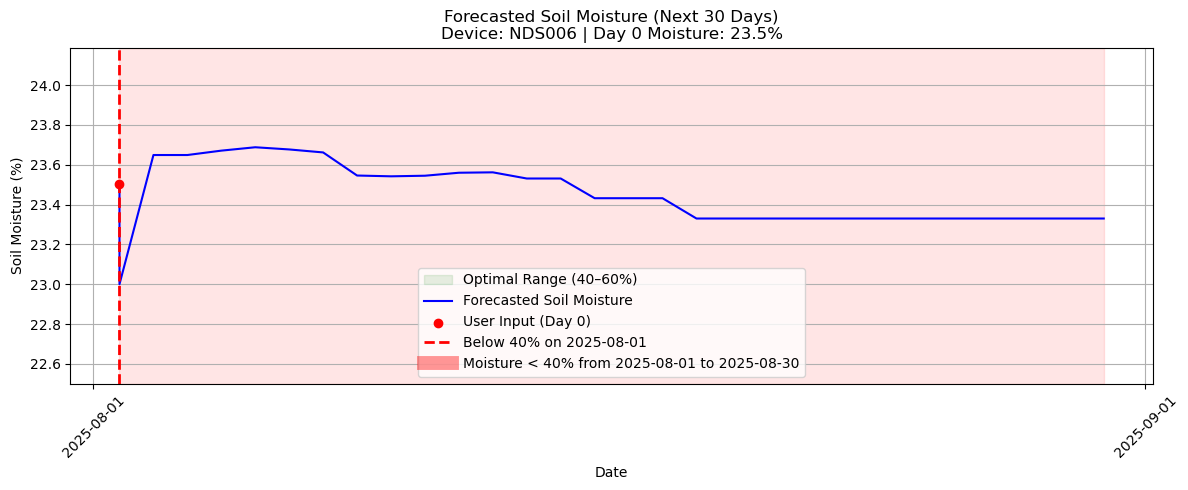

In [29]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Ensure forecast_df is sorted
forecast_df = forecast_df.sort_values('dbtimestamp')

# Calculate y-axis limits with buffer
y_min = forecast_df['Predicted Soil Moisture'].min()
y_max = forecast_df['Predicted Soil Moisture'].max()

if y_max - y_min < 1:
    y_buffer = 0.5
    y_min -= y_buffer
    y_max += y_buffer
else:
    y_min -= 1
    y_max += 1

# Create plot
plt.figure(figsize=(12, 5))

# Shade optimal moisture range (40–60%)
plt.axhspan(40, 60, color='green', alpha=0.1, label='Optimal Range (40–60%)')

# Plot forecast line
plt.plot(forecast_df['dbtimestamp'], forecast_df['Predicted Soil Moisture'],
         label='Forecasted Soil Moisture', color='blue')

# Plot Day 0 user input
plt.scatter(forecast_df['dbtimestamp'].iloc[0],
            forecast_df['Predicted Soil Moisture'].iloc[0],
            color='red', label='User Input (Day 0)', zorder=5)

# Highlight drop below 40%
below_40 = forecast_df[forecast_df['Predicted Soil Moisture'] < 40]
if not below_40.empty:
    drop_start = below_40.iloc[0]['dbtimestamp']
    drop_end = below_40.iloc[-1]['dbtimestamp']
    
    # Draw vertical line at first drop
    plt.axvline(x=drop_start, color='red', linestyle='--', linewidth=2,
                label=f'Below 40% on {drop_start.date()}')

    # Shade full period of low moisture
    plt.axvspan(drop_start, drop_end, color='red', alpha=0.1)
    plt.plot([], [], color='red', alpha=0.4, linewidth=10,
             label=f'Moisture < 40% from {drop_start.date()} to {drop_end.date()}')

# Title, labels, and formatting
moisture_day0 = forecast_df['Predicted Soil Moisture'].iloc[0]
plt.title(f"Forecasted Soil Moisture (Next 30 Days)\nDevice: {best_device} | Day 0 Moisture: {moisture_day0:.1f}%")
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Apply y-axis limits safely
plt.ylim(max(0, y_min), min(100, y_max))

plt.tight_layout()
plt.show()


In [30]:
forecast_df.head(10)  # Display the first few rows of the forecast DataFrame

,Soil EC,Soil pH,Soil Moisture,Soil Temperature,green_g,brown_g,water_g,days_since_last_green,days_since_last_brown,days_since_last_water,Predicted Soil Moisture,dbtimestamp,Air Temperature,Humidity
1,262.0,5.5,23.000,24.0,23.000000,233.000000,342.000000,0,0,0,23.502,2025-08-01 18:31:21.036506,29.93,71.0
0,262.0,5.5,23.000,24.0,23.000000,233.000000,342.000000,0,0,0,23.000,2025-08-01 18:31:21.948298,NaN,NaN
2,262.0,5.5,23.502,24.0,20.700000,209.700000,324.900000,1,1,1,23.649,2025-08-02 18:31:21.070430,29.93,71.0
3,262.0,5.5,23.649,24.0,18.630000,188.730000,308.655000,2,2,2,23.649,2025-08-03 18:31:21.099985,29.93,71.0
4,262.0,5.5,23.649,24.0,16.767000,169.857000,293.222250,3,3,3,23.671,2025-08-04 18:31:21.130404,29.93,71.0
5,262.0,5.5,23.671,24.0,15.090300,152.871300,278.561137,4,4,4,23.688,2025-08-05 18:31:21.159389,29.93,71.0
6,262.0,5.5,23.688,24.0,13.581270,137.584170,264.633081,5,5,5,23.677,2025-08-06 18:31:21.185296,29.93,71.0
7,262.0,5.5,23.677,24.0,12.223143,123.825753,251.401427,6,6,6,23.662,2025-08-07 18:31:21.213154,29.93,71.0
8,262.0,5.5,23.662,24.0,11.000829,111.443178,238.831355,7,7,7,23.546,2025-08-08 18:31:21.241911,29.93,71.0
9,262.0,5.5,23.546,24.0,9.900746,100.298860,226.889788,8,8,8,23.542,2025-08-09 18:31:21.271652,29.93,71.0


In [31]:
forecast_df.describe()  # Get a statistical summary of the forecast DataFrame

,Soil EC,Soil pH,Soil Moisture,Soil Temperature,green_g,brown_g,water_g,days_since_last_green,days_since_last_brown,days_since_last_water,Predicted Soil Moisture,dbtimestamp,Air Temperature,Humidity
count,31.0,31.0,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31,3.000000e+01,30.0
mean,262.0,5.5,23.437774,24.0,7.846775,79.491245,184.318415,14.032258,14.032258,14.032258,23.448419,2025-08-15 19:17:48.587396864,2.993000e+01,71.0
min,262.0,5.5,23.000000,24.0,1.083330,10.974600,77.269955,0.000000,0.000000,0.000000,23.000000,2025-08-01 18:31:21.036506,2.993000e+01,71.0
25%,262.0,5.5,23.330000,24.0,2.390805,24.219893,113.560274,6.500000,6.500000,6.500000,23.330000,2025-08-08 06:31:21.227532544,2.993000e+01,71.0
50%,262.0,5.5,23.432000,24.0,5.261662,53.302926,166.784843,14.000000,14.000000,14.000000,23.432000,2025-08-15 18:31:21.465500928,2.993000e+01,71.0
75%,262.0,5.5,23.553000,24.0,11.611986,117.634465,245.116391,21.500000,21.500000,21.500000,23.553000,2025-08-23 06:31:21.688403456,2.993000e+01,71.0
max,262.0,5.5,23.688000,24.0,23.000000,233.000000,342.000000,29.000000,29.000000,29.000000,23.688000,2025-08-30 18:31:21.915080,2.993000e+01,71.0
std,0.0,0.0,0.175354,0.0,6.830029,69.191164,83.297940,9.038746,9.038746,9.038746,0.156943,NaN,1.806724e-14,0.0


Export to csv

In [32]:
forecast_df.to_csv('30_day_soil_moisture_forecast.csv', index=False)

In [33]:
import joblib

# Save model to file
joblib.dump(forecast_df, 'plant_moist_model.pkl')

['plant_moist_model.pkl']